<a id="header"></a>
# Part 6: Crafting openers

In [1]:
from samurai import *
from plotting import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
from IPython.display import display
%matplotlib inline

pd.options.display.max_rows = None

[Return home](../)

<a id="buff-priority"></a>
## Crafting openers

The opener in any fight is where players aim to align party buffs with their highest potency actions to maximize the damage dealt, taking advantage of the stacking nature of most buffs. As such, the best opener for any situation will rely on the party composition and coordinating the aforementioned buffs. 

Samurai has a number of action items to accomplish in an opener:

- Gain Jinpu buff
- Gain Shifu buff
- Apply slashing resistance down debuff through Yukikaze
- Apply Higanbana with Hissatsu: Kaiten
- Use Midare Setsugekka with Hissatsu: Kaiten
- Use Hissatsu: Guren
- Extra Kenki spent on Hissatsu: Shinten under buffs

Samurai has its two main offensive cooldowns to facilitate those goals:

- Meikyo Shisui to deal high damage, open Sen, and generate Kenki in rapid fashion
- Hagakure to generate Kenki on demand

There is a plethora of party buffs/debuffs to consider as well:

- AST: The Balance
- SCH: Chain Stratagem
- WAR/NIN: Slashing resistance down
- NIN: Trick Attack
- MNK: Brotherhood
- DRG: Dragon Sight, Battle Litany
- RDM: Embolden
- SMN: Devotion
- MCH: Hypercharge
- BRD: Army's Paeon/Mage's Ballad/Wanderer's Minuet, Battle Voice

We'll look into a number of example openers and compare their potencies over time. In a vacuum, practicing any of these options for general purposes should be sufficient. Adapting to your party composition to maximize opener damage is the icing on top.

### Option 1
- Kasha combo converted with Hagakure
- Gekko combo into Meikyo Shisui
- Three Sen into Midare Setsugekka (with Hissatsu: Kaiten)
- Final Sen into Higanbana (with Hissatsu: Kaiten)

In [32]:
sam = Samurai(base_gcd=2.40, kenki_mastery=2)

actions = [('Hakaze'), ('Shifu'), ('Kasha', 'Hagakure'),
           ('Hakaze'), ('Jinpu'), ('Gekko', 'Meikyo Shisui'),
           ('Yukikaze', 'Hissatsu: Guren'), ('Kasha', 'Hissatsu: Kaiten'), ('Midare Setsugekka'), ('Gekko', 'Hissatsu: Kaiten'),
           ('Higanbana')]

In [33]:
df_opt_0, average_potency, pps = sam.parse_rotation(actions)
display(df_opt_0)

average potency per GCD = 553.2809090909091
average potency per second = 253.587083333


,Time,Weaponskill,Abilities,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.00,False,False,False,0,0,150.00
1,2.40,Shifu,,280.00,False,False,False,0,5,430.00
2,4.56,Kasha,"(Hagakure,)",400.00,False,True,False,0,10,830.00
3,6.72,Hakaze,,150.00,False,True,False,0,40,980.00
4,8.88,Jinpu,,280.00,False,True,False,0,45,1260.00
5,11.04,Gekko,"(Meikyo Shisui,)",460.00,True,True,False,0,50,1720.00
6,13.20,Yukikaze,"(Hissatsu: Guren,)",1412.20,True,True,False,0,60,3132.20
7,15.36,Kasha,"(Hissatsu: Kaiten,)",510.60,True,True,True,0,20,3642.80
8,17.52,Midare Setsugekka,,1378.62,True,True,True,0,10,5021.42
9,19.68,Gekko,"(Hissatsu: Kaiten,)",510.60,True,True,True,0,10,5532.02


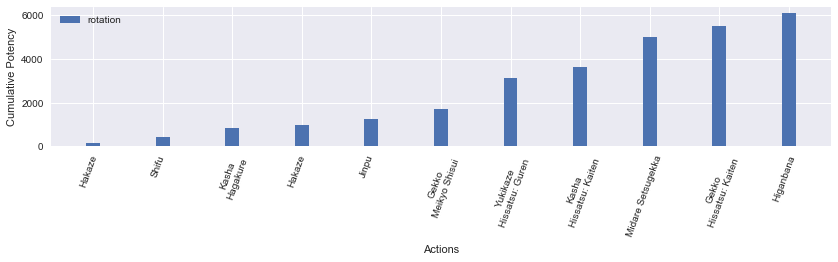

In [34]:
plot_potency(df_opt_0)

#### Pros
- Early usage of Hagakure
- Buffed Midare Setsugekka and Higanbana under 25s
- Early Hissatsu: Guren

#### Cons
- Later Meikyo Shisui
- Late Yukikaze
- Higanbana may miss an early Trick Attack or other short duration buff

This opener makes sure that all the high potency actions are buffed by you as much as possible. The meat of the opener is from approximately 11-21s, thanks to Meikyo Shisui. At the tested base GCD of 2.40s, it is not possible to contain the entirety of this window under a 10s Trick Attack, due to the cast time of Higanbana. The ideal window to cover would be indices 6-10, encompassing both Iaijutsu and the Hissatsu: Guren plus combo finishers only. Fifteen second buffs and longer should have no issues catching this window, provided they are not used at a delayed time (Brotherhood and Embolden are the most likely cases.) Another thing to note is that Hissatsu: Kaiten may still be on cooldown for the Higanbana as listed above. You risk clipping the Higanbana GCD if you need to wait for it to come off cooldown after Gekko. If that's a concern, Higanbana can be delayed one GCD in favor of Hakaze. While the computed potency per GCD/per second appear rather mediocre here, we cannot discount the value of the buffed Higanbana DoT. 

A slight variation on this opener would be swapping the first Gekko and Kasha combos. As we saw in part 5, their utilities are more or less interchangeable. Moving the Shifu buff would have a slight effect on timing that may be useful.

average potency per GCD = 564.5990909090909
average potency per second = 251.237459547


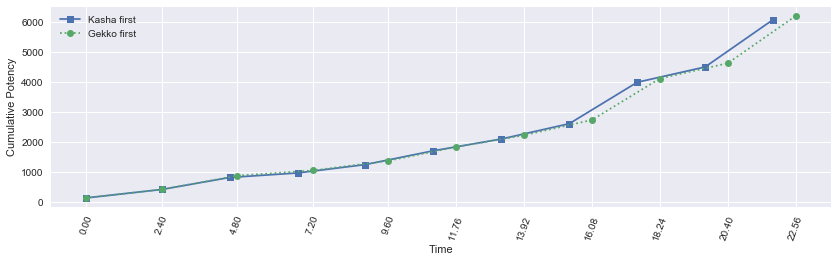

In [27]:
sam = Samurai(base_gcd=2.40, kenki_mastery=2)

actions = [('Hakaze'), ('Jinpu'), ('Gekko', 'Hagakure'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Meikyo Shisui'),
           ('Yukikaze'), ('Gekko', 'Hissatsu: Kaiten'), ('Midare Setsugekka'), ('Kasha', 'Hissatsu: Kaiten'),
           ('Higanbana', 'Hissatsu: Guren')]

df_opt_0b, average_potency, pps = sam.parse_rotation(actions)

compare_potencies([df_opt_0, df_opt_0b], ['Kasha first', 'Gekko first'])

### Option 2
- Kasha, Gekko, Yukikaze combos to open three Sen
- Double weave Hagakure and Meikyo Shisui
- Three Sen into Midare Setsugekka (with Hissatsu: Kaiten)
- Kasha combo into Higanbana (with Hissatsu: Kaiten)

In [28]:
sam = Samurai(base_gcd=2.40, kenki_mastery=2)

actions = [('Hakaze'), ('Shifu'), ('Kasha'),
           ('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Yukikaze', 'Hagakure', 'Meikyo Shisui'),
           ('Kasha', 'Hissatsu: Guren'), ('Yukikaze'), ('Gekko', 'Hissatsu: Kaiten'), ('Midare Setsugekka'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Yukikaze', 'Hissatsu: Kaiten'), ('Higanbana')]

In [29]:
df_opt_1, average_potency, pps = sam.parse_rotation(actions)
display(df_opt_1)

average potency per GCD = 531.2963333333335
average potency per second = 244.161917892


,Time,Weaponskill,Abilities,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,False,False,False,0,0,150.000
1,2.40,Shifu,,280.000,False,False,False,0,5,430.000
2,4.56,Kasha,,400.000,False,True,False,0,10,830.000
3,6.72,Hakaze,,150.000,False,True,False,0,20,980.000
4,8.88,Jinpu,,280.000,False,True,False,0,25,1260.000
5,11.04,Gekko,,460.000,True,True,False,0,30,1720.000
6,13.20,Hakaze,"(Hissatsu: Shinten,)",517.500,True,True,False,0,40,2237.500
7,15.36,Yukikaze,"(Hagakure, Meikyo Shisui)",391.000,True,True,False,0,20,2628.500
8,17.52,Kasha,"(Hissatsu: Guren,)",1531.800,True,True,True,0,90,4160.300
9,19.68,Yukikaze,,434.010,True,True,True,0,50,4594.310


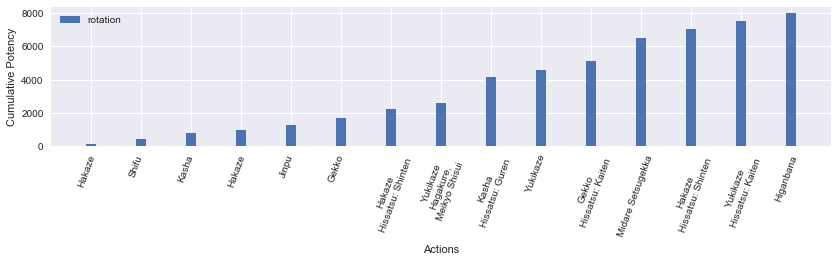

In [31]:
plot_potency(df_opt_1)

#### Pros
- Bulk of the potency is delayed compared to Option 1 for late party buffs (e.g., Brotherhood and Embolden)

#### Cons
- Later Hagakure
- Later Meikyo Shisui
- Late Higanbana
- The window of Hissatsu: Guren, Midare Setsugekka, and Higanbana is ~15s long

The windup here is a little longer because it opens three Sen first to convert with Hagakure. There's some potency left on the table here due to the 20 Kenki remaining that will likely be spent after the next GCD. The benefits here are the inclusion of Hissatsu: Shinten with the extra Kenki generated and the slight delay in the meat of the opener (~17-31s). The late Higanbana here is an issue for a phase whose horizon is long (e.g., full uptime encounter with no breaks). It may also be an issue if it doesn't catch any party buffs. However, it is not an issue for a short phase (e.g., 90-100s) where only one Higanbana would have gotten its full duration or close to it.